# step 1 : understand the problems..

* predicting the price of house



# step 2 : import the all library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,BaggingClassifier,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB # support in only categorical target..
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

# step 3: load the data..

In [2]:
da=pd.read_csv("CHENNAI.csv")
df=pd.DataFrame(da)
df.head(pd.set_option("display.max_columns",None))

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


# data processing..

In [3]:
df["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [4]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [5]:
df["BUILDTYPE"]=df["BUILDTYPE"].str.replace("Comercial","Commercial")

In [6]:
df["BUILDTYPE"]=df["BUILDTYPE"].str.replace("Others","Other")

In [7]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Other', 'House'], dtype=object)

In [8]:
df["PARK_FACIL"]=df["PARK_FACIL"].str.replace("Noo","No")

In [9]:
df["PARK_FACIL"].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Other,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Other,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [11]:
df.tail()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,15-01-1962,Other,ELO,No Access,RM,3.0,2.2,2.4,2.52,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,11-04-1995,Other,NoSeWa,No Access,RH,3.6,4.5,3.3,3.92,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.84,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,425350,119098,8507000
7108,P09794,Velachery,1896,13-07-2005,156,3.0,2.0,5,Partial,Yes,24-07-1961,Other,ELO,Paved,I,3.1,3.5,4.3,3.64,349177,79812,9976480


In [12]:
df.sample(3)

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
1547,P09569,Velachery,1851,28-09-2006,100,3.0,2.0,5,Partial,No,02-10-1990,Other,ELO,Paved,RM,4.7,3.7,4.7,4.25,356633,200606,11144770
1243,P02246,Chrompet,1227,07-11-2011,104,2.0,1.0,4,Normal Sale,Yes,14-11-1980,Other,ELO,Paved,RL,3.7,4.9,3.0,3.97,314977,157489,10499240
4026,P00570,Chrompet,885,29-12-2013,105,1.0,1.0,3,Partial,Yes,05-01-1988,Commercial,NoSeWa,No Access,RL,3.4,2.2,4.0,3.10,306838,76710,10958500


In [13]:
print("shape :",df.shape)
print("size :",df.size)

shape : (7109, 22)
size : 156398


In [14]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [15]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

## Handle the missing value..

In [17]:
# find the missing value
df.isna().sum()
# given data is no missing value..

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [18]:
df["QS_OVERALL"].fillna(value=df["QS_OVERALL"].median(),inplace=True)

In [19]:
df["N_BATHROOM"].fillna(value=df["N_BATHROOM"].median(),inplace=True)

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()# get the clear dataset..

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [22]:
df.duplicated().sum() # no duplicated value..

0

## select the numerical and categorical value..

In [23]:
num=df.select_dtypes(include=["float","int"])
num

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,13159200
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,9630290
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,1897,52,3.0,2.0,5,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,1614,152,2.0,1.0,4,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,787,40,1.0,1.0,2,4.6,3.8,4.1,4.160,425350,119098,8507000


In [24]:
cat=df.select_dtypes(include=["object"])
cat

,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,P05346,Velachery,13-03-2010,Family,No,18-03-1988,Other,NoSewr,Paved,I
4,P06210,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Other,AllPub,Gravel,C
...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,03-01-2011,AdjLand,No,15-01-1962,Other,ELO,No Access,RM
7105,P10000,Velachery,08-04-2004,Family,Yes,11-04-1995,Other,NoSeWa,No Access,RH
7106,P09594,Velachery,25-08-2006,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I
7107,P06508,Karapakkam,03-08-2009,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL


In [25]:
categorical=df[["SALE_COND","BUILDTYPE","UTILITY_AVAIL","STREET","MZZONE"]]
categorical

,SALE_COND,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,AbNormal,Commercial,AllPub,Paved,A
1,AbNormal,Commercial,AllPub,Gravel,RH
2,AbNormal,Commercial,ELO,Gravel,RL
3,Family,Other,NoSewr,Paved,I
4,AbNormal,Other,AllPub,Gravel,C
...,...,...,...,...,...
7104,AdjLand,Other,ELO,No Access,RM
7105,Family,Other,NoSeWa,No Access,RH
7106,Normal Sale,House,NoSeWa,Gravel,I
7107,Partial,Commercial,ELO,Paved,RL


## EDA analysis..

In [26]:
num.shape

(7108, 12)

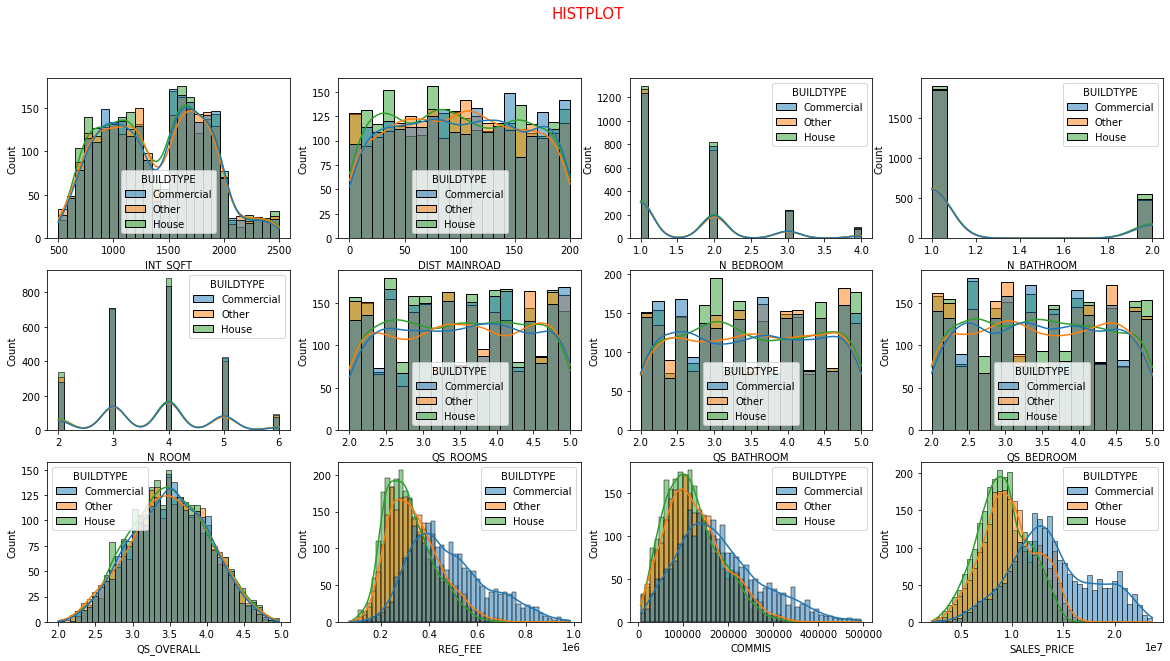

In [27]:
plt.figure(figsize=(20,10)) # hist plot also used to check dataset how much distributed..
no=1
for i in num:
    if no<=12:
        plt.suptitle("HISTPLOT",fontsize=15,color="red")
        plt.subplot(3,4,no)
        sns.histplot(x=num[i],data=df,kde=True,hue=df["BUILDTYPE"])
        plt.xlabel(i)
    no+=1

In [28]:
categorical.shape

(7108, 5)

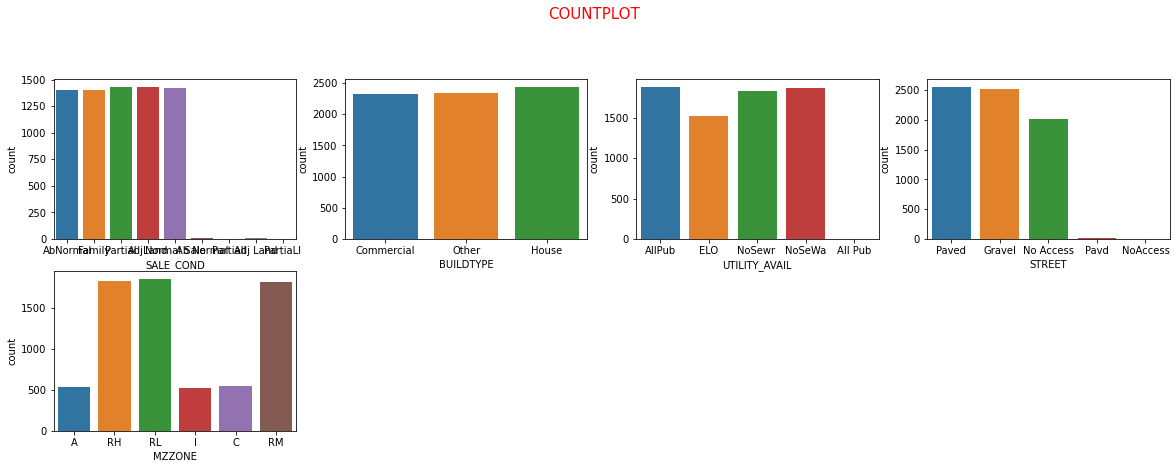

In [29]:
plt.figure(figsize=(20,10)) # hist plot also used to check dataset how much distributed..
no=1
for i in categorical:
    if no<=12:
        plt.suptitle("COUNTPLOT",fontsize=15,color="red")
        plt.subplot(3,4,no)
        sns.countplot(x=categorical[i],data=df)
        plt.xlabel(i)
    no+=1

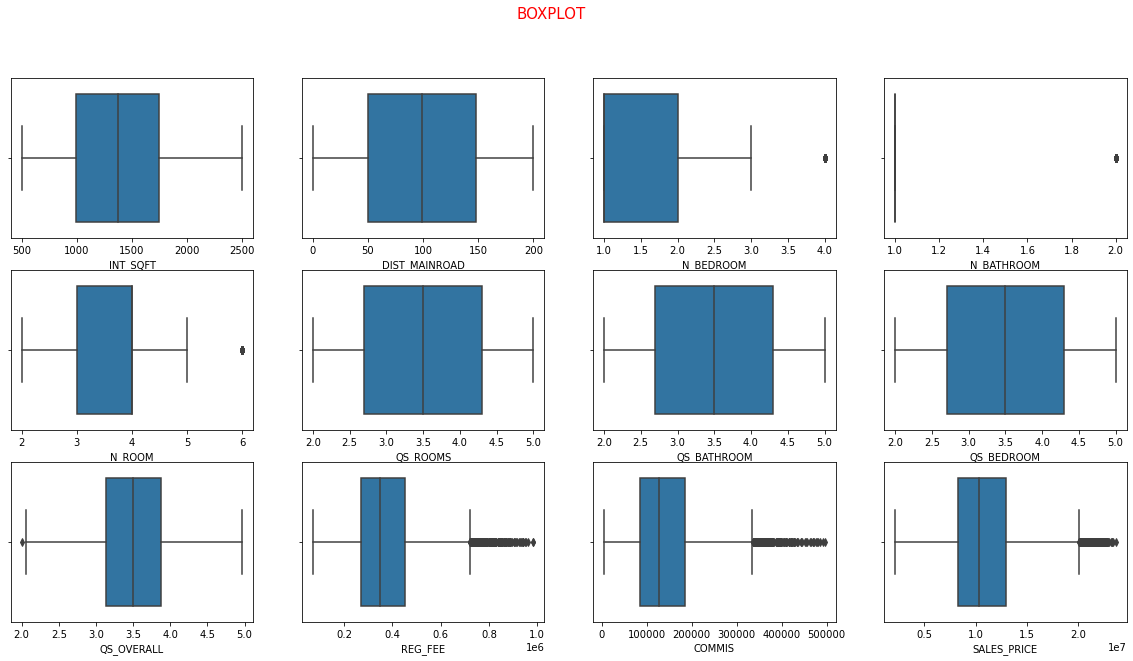

In [30]:
plt.figure(figsize=(20,10)) # box plot also used to check dataset outlier..
no=1
for i in num:
    if no<=12:
        plt.suptitle("BOXPLOT",fontsize=15,color="red")
        plt.subplot(3,4,no)
        sns.boxplot(x=num[i],data=df)
        plt.xlabel(i)
    no+=1

In [31]:
#REG_FEE,COMMIS,SALES_PRICE present in outlier used to remove in iqr or z_score,emperical rule

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

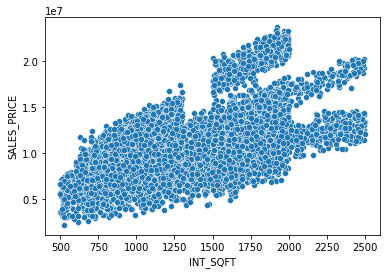

In [32]:
sns.scatterplot(x="INT_SQFT",y="SALES_PRICE",data=df,palette=True)

In [33]:
# increase the sqrt price proportional to increase the sales price..
# sqrt 1750 above high rate.

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

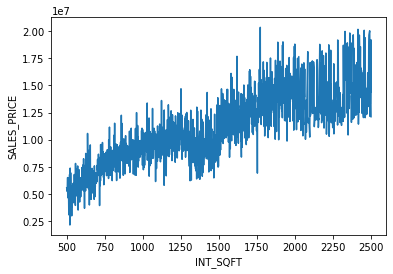

In [34]:
sns.lineplot(x="INT_SQFT",y="SALES_PRICE",data=df,palette=True,ci=None)

<AxesSubplot:xlabel='INT_SQFT', ylabel='SALES_PRICE'>

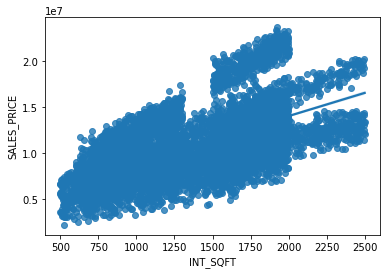

In [35]:
sns.regplot(x="INT_SQFT",y="SALES_PRICE",data=df) # this makes two continuous data split in interval line..

<AxesSubplot:xlabel='BUILDTYPE', ylabel='SALES_PRICE'>

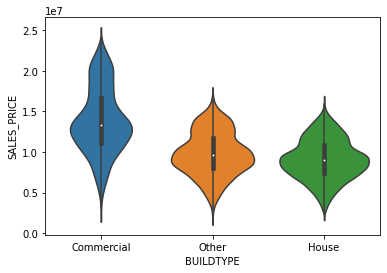

In [36]:
sns.violinplot(y="SALES_PRICE",x="BUILDTYPE",data=df)

## Feature engineering.. 

In [37]:
c=df.corr()
c

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.001947,0.786348,0.515333,0.951278,0.019776,-0.008290,0.008957,0.014015,0.657584,0.571111,0.612133
DIST_MAINROAD,0.001947,1.000000,-0.002566,0.001954,0.002240,0.001950,-0.029294,0.001889,-0.017128,0.011691,0.011080,0.018791
N_BEDROOM,0.786348,-0.002566,1.000000,0.755197,0.840286,0.015112,-0.007635,0.015569,0.014167,0.455357,0.430424,0.330999
N_BATHROOM,0.515333,0.001954,0.755197,1.000000,0.568578,0.013484,-0.012110,0.013071,0.007911,0.260220,0.256703,0.108835
N_ROOM,0.951278,0.002240,0.840286,0.568578,1.000000,0.016464,-0.007507,0.015147,0.015435,0.630964,0.533371,0.602765
QS_ROOMS,0.019776,0.001950,0.015112,0.013484,0.016464,1.000000,0.009011,0.008130,0.516368,0.019833,0.009463,0.021976
QS_BATHROOM,-0.008290,-0.029294,-0.007635,-0.012110,-0.007507,0.009011,1.000000,-0.011960,0.549010,-0.006776,-0.000524,-0.011381
QS_BEDROOM,0.008957,0.001889,0.015569,0.013071,0.015147,0.008130,-0.011960,1.000000,0.628154,0.021425,0.020024,0.018802
QS_OVERALL,0.014015,-0.017128,0.014167,0.007911,0.015435,0.516368,0.549010,0.628154,1.000000,0.022363,0.016904,0.020473
REG_FEE,0.657584,0.011691,0.455357,0.260220,0.630964,0.019833,-0.006776,0.021425,0.022363,1.000000,0.659894,0.878159


<AxesSubplot:>

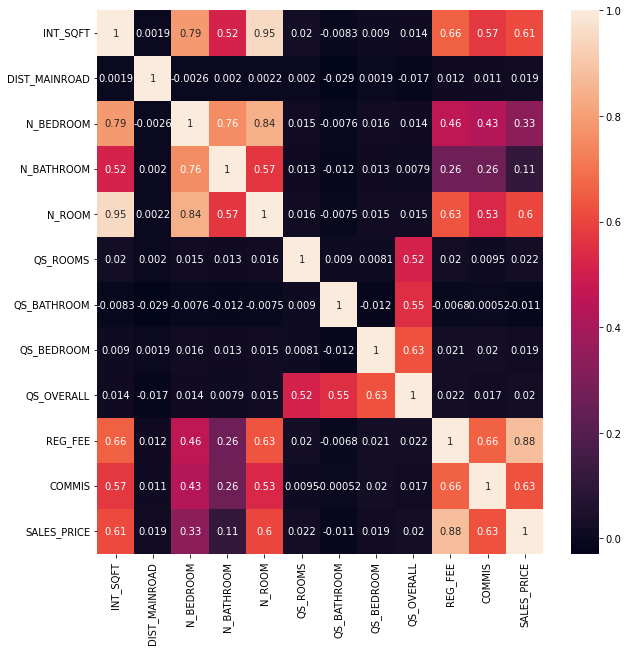

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(data=c,annot=True)

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
INT_SQFT,7108.0,1.382049e+03,4.574384e+02,500.0,993.00,1373.0,1744.00,2500.00
DIST_MAINROAD,7108.0,9.959173e+01,5.739903e+01,0.0,50.00,99.0,148.00,200.00
N_BEDROOM,7108.0,1.637029e+00,8.029016e-01,1.0,1.00,1.0,2.00,4.00
N_BATHROOM,7108.0,1.213140e+00,4.095546e-01,1.0,1.00,1.0,1.00,2.00
N_ROOM,7108.0,3.688661e+00,1.019164e+00,2.0,3.00,4.0,4.00,6.00
QS_ROOMS,7108.0,3.517290e+00,8.919054e-01,2.0,2.70,3.5,4.30,5.00
QS_BATHROOM,7108.0,3.507358e+00,8.978458e-01,2.0,2.70,3.5,4.30,5.00
QS_BEDROOM,7108.0,3.485509e+00,8.871539e-01,2.0,2.70,3.5,4.30,5.00
QS_OVERALL,7108.0,3.503281e+00,5.254605e-01,2.0,3.13,3.5,3.88,4.97
REG_FEE,7108.0,3.769473e+05,1.430787e+05,71177.0,272398.50,349497.5,451583.00,983922.00


# convert the categorical to numerical data..

In [40]:
cat

,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,P05346,Velachery,13-03-2010,Family,No,18-03-1988,Other,NoSewr,Paved,I
4,P06210,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Other,AllPub,Gravel,C
...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,03-01-2011,AdjLand,No,15-01-1962,Other,ELO,No Access,RM
7105,P10000,Velachery,08-04-2004,Family,Yes,11-04-1995,Other,NoSeWa,No Access,RH
7106,P09594,Velachery,25-08-2006,Normal Sale,No,01-09-1978,House,NoSeWa,Gravel,I
7107,P06508,Karapakkam,03-08-2009,Partial,Yes,11-08-1977,Commercial,ELO,Paved,RL


In [41]:
df["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [42]:
enc=LabelEncoder()
df.loc[:,["PARK_FACIL","BUILDTYPE","MZZONE"]]=\
df.loc[:,["PARK_FACIL","BUILDTYPE","MZZONE"]].apply(enc.fit_transform)

In [43]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,1,15-05-1967,0,AllPub,Paved,0,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,0,22-12-1995,0,AllPub,Gravel,3,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,1,09-02-1992,0,ELO,Gravel,4,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,0,18-03-1988,2,NoSewr,Paved,2,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,1,13-10-1979,2,AllPub,Gravel,1,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,0,15-01-1962,2,ELO,No Access,5,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,1,11-04-1995,2,NoSeWa,No Access,3,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,0,01-09-1978,1,NoSeWa,Gravel,2,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,1,11-08-1977,0,ELO,Paved,4,4.6,3.8,4.1,4.160,425350,119098,8507000


In [44]:
df.drop(["AREA","PRT_ID","DATE_SALE","DATE_BUILD","UTILITY_AVAIL","STREET","SALE_COND"],axis=1,inplace=True)

## clear data set..

In [45]:
df 

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1.0,1.0,3,1,0,0,4.0,3.9,4.9,4.330,380000,144400,7600000
1,1986,26,2.0,1.0,5,0,0,3,4.9,4.2,2.5,3.765,760122,304049,21717770
2,909,70,1.0,1.0,3,1,0,4,4.1,3.8,2.2,3.090,421094,92114,13159200
3,1855,14,3.0,2.0,5,0,2,2,4.7,3.9,3.6,4.010,356321,77042,9630290
4,1226,84,1.0,1.0,3,1,2,1,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,0,2,5,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,1897,52,3.0,2.0,5,1,2,3,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,1614,152,2.0,1.0,4,0,1,2,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,787,40,1.0,1.0,2,1,0,4,4.6,3.8,4.1,4.160,425350,119098,8507000


In [46]:
#enc.fit(df["AREA"])

# Transform the "AREA" column to numerical labels
#df["AREA"] = enc.transform(df["AREA"])

In [47]:
df

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1.0,1.0,3,1,0,0,4.0,3.9,4.9,4.330,380000,144400,7600000
1,1986,26,2.0,1.0,5,0,0,3,4.9,4.2,2.5,3.765,760122,304049,21717770
2,909,70,1.0,1.0,3,1,0,4,4.1,3.8,2.2,3.090,421094,92114,13159200
3,1855,14,3.0,2.0,5,0,2,2,4.7,3.9,3.6,4.010,356321,77042,9630290
4,1226,84,1.0,1.0,3,1,2,1,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,0,2,5,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,1897,52,3.0,2.0,5,1,2,3,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,1614,152,2.0,1.0,4,0,1,2,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,787,40,1.0,1.0,2,1,0,4,4.6,3.8,4.1,4.160,425350,119098,8507000


In [48]:

#df["AREA"] = enc.inverse_transform(df["AREA"]) #-(convert the numerical to categorical)

In [49]:
#df  -get the clear data set..

# create the model

In [50]:
df.shape

(7108, 15)

In [51]:
x=df.iloc[:,0:14]
x

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS
0,1004,131,1.0,1.0,3,1,0,0,4.0,3.9,4.9,4.330,380000,144400
1,1986,26,2.0,1.0,5,0,0,3,4.9,4.2,2.5,3.765,760122,304049
2,909,70,1.0,1.0,3,1,0,4,4.1,3.8,2.2,3.090,421094,92114
3,1855,14,3.0,2.0,5,0,2,2,4.7,3.9,3.6,4.010,356321,77042
4,1226,84,1.0,1.0,3,1,2,1,3.0,2.5,4.1,3.290,237000,74063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,598,51,1.0,1.0,2,0,2,5,3.0,2.2,2.4,2.520,208767,107060
7105,1897,52,3.0,2.0,5,1,2,3,3.6,4.5,3.3,3.920,346191,205551
7106,1614,152,2.0,1.0,4,0,1,2,4.3,4.2,2.9,3.840,317354,167028
7107,787,40,1.0,1.0,2,1,0,4,4.6,3.8,4.1,4.160,425350,119098


In [52]:
x.shape


(7108, 14)

In [53]:
y=df.iloc[:,14]
y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7108, dtype: int64

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=4)

# Linear method..

In [55]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
linear=LinearRegression()
linear=linear.fit(x_train,y_train)
pre=linear.predict(x_test)
test=r2_score(y_test,pre) 
#test=linear.score(x_test,y_test) this another way find out the test accuracy..
train=linear.score(x_train,y_train)
# error calculated..
MAE=mean_absolute_error(y_test,pre)
MSE=mean_squared_error(y_test,pre)
RMSE=mean_squared_error(y_test,pre,squared=False)
print("mean absolute error :",MAE)
print("mean squared error :",MSE)
print("root mean squared error :",RMSE)
print("test accuracy :",test)
print("train accuracy :",train)

mean absolute error : 1040530.7663818412
mean squared error : 1716641479737.955
root mean squared error : 1310206.6553555417
test accuracy : 0.880083571499127
train accuracy : 0.8726123483675471


## XGBOOST method

In [56]:
from xgboost import XGBRegressor
XGBRegressor()


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
xg=XGBRegressor(gamma=0.00,random_state=2,subsample=0.5,colsample_bylevel=0.5,colsample_bytree=0.5,
                max_depth=3,n_estimators=400,min_child_weight=90)
xg=xg.fit(x_train,y_train)
pre1=xg.predict(x_test)
test1=r2_score(y_test,pre1)
#xg.score(x_test,y_test) -test accuracy
train1=xg.score(x_train,y_train)
MAE1=mean_absolute_error(y_test,pre1)
MSE1=mean_squared_error(y_test,pre1)
RMSE1=mean_squared_error(y_test,pre1,squared=False)
print("mean absolute error :",MAE1)
print("mean squared error :",MSE1)
print("root mean squared error :",RMSE1)
print("test accuracy :",test1)
print("train accuracy :",train1)

mean absolute error : 631173.5369198312
mean squared error : 686028883995.6522
root mean squared error : 828268.6061874204
test accuracy : 0.9520772772951075
train accuracy : 0.9697018495123376


## KNN method..

In [58]:
knn=KNeighborsRegressor(n_neighbors=400,leaf_size=10,p=1)
knn=knn.fit(x_train,y_train)
pre3=knn.predict(x_test)
#knn.score(x_test,y_test)
test2=r2_score(y_test,pre3)
train2=knn.score(x_train,y_train)
MAE3=mean_absolute_error(y_test,pre3)
MSE3=mean_squared_error(y_test,pre3)
RMSE3=mean_squared_error(y_test,pre3,squared=False)
print("mean absolute error :",MAE3)
print("mean squared error :",MSE3)
print("root mean squared error :",RMSE3)
print(" test accuracy :",test2)
print("train accuracy :",train2)

mean absolute error : 1383610.3372011252
mean squared error : 3171959284702.503
root mean squared error : 1780999.5184453316
 test accuracy : 0.7784219749660415
train accuracy : 0.7777688766198674


## gradientboost method..

In [59]:
gd=GradientBoostingRegressor(subsample=0.9,random_state=3)
gd=gd.fit(x_train,y_train)
#gd.score(x_test,y_test)
pre4=gd.predict(x_test)
test3=r2_score(y_test,pre4)
train3=gd.score(x_train,y_train)
MAE4=mean_absolute_error(y_test,pre4)
MSE4=mean_squared_error(y_test,pre4)
RMSE4=mean_squared_error(y_test,pre4,squared=False)
print("mean absolute error :",MAE4)
print("mean squared error :",MSE4)
print("root mean squared error :",RMSE4)
print("test accuracy :",test3)
print("train accuracy :",train3)

mean absolute error : 656846.3636256764
mean squared error : 742308978553.4156
root mean squared error : 861573.5479652423
test accuracy : 0.9481458169321151
train accuracy : 0.9535026496585375


## Desicion tree method..

In [60]:
dt=DecisionTreeRegressor(max_depth=100,min_samples_split=20,min_samples_leaf=10,
                         max_leaf_nodes=100,criterion="absolute_error",max_features=10)
dt=dt.fit(x_train,y_train)
#dt.score(x_test,y_test)
pre5=dt.predict(x_test)
test4=r2_score(y_test,pre5)
train4=dt.score(x_train,y_train)
MAE5=mean_absolute_error(y_test,pre5)
MSE5=mean_squared_error(y_test,pre5)
RMSE5=mean_squared_error(y_test,pre5,squared=False)
print("mean absolute error :",MAE5)
print("mean squared error :",MSE5)
print("root mean squared error :",RMSE5)
print("test accuracy :",test4)
print("train accuracy :",train4)

mean absolute error : 887042.5386779184
mean squared error : 1432515143822.2573
root mean squared error : 1196877.2467643695
test accuracy : 0.8999312891782143
train accuracy : 0.9208507429674416


## Random forest method..

In [61]:
rf=RandomForestRegressor(n_estimators=40,max_depth=90,max_leaf_nodes=90,min_samples_split=90, 
                         min_samples_leaf=30,ccp_alpha=0.08)
rf=rf.fit(x_train,y_train)
#rf.score(x_test,y_test)
pre6=rf.predict(x_test)
test5=r2_score(y_test,pre6)
train5=rf.score(x_train,y_train)
MAE6=mean_absolute_error(y_test,pre6)
MSE6=mean_squared_error(y_test,pre6)
RMSE6=mean_squared_error(y_test,pre6,squared=False)
print("mean absolute error :",MAE6)
print("mean squared error :",MSE6)
print("root mean squared error :",RMSE6)
print("test accuracy :",test5)
print("train accuracy :",train5)

mean absolute error : 850948.9677894649
mean squared error : 1233282589413.1255
root mean squared error : 1110532.5701721339
test accuracy : 0.9138487300928403
train accuracy : 0.9295145851031864


## Deployment develop..

In [62]:
import pickle as pk

In [63]:
pk.dump(rf,open("house price.pkl","wb"))

In [64]:
read=pk.load(open("house price.pkl","rb"))

In [65]:
#xg.predict(x_test)

## predict the pardicular  value..

In [66]:
gd.predict([[1004,131,1.0,1.0,3,1,0,0,4.0,3.9,4.9,4.330,380000,144400]])[0]

10215447.179887095

In [67]:
10484129.720039804-7600000

2884129.7200398035

In [68]:
rf.predict([[1004,131,1.0,1.0,3,1,0,0,4.0,3.9,4.9,4.330,380000,144400]])[0]

10326423.577388901

In [69]:
10425391.273323942-7600000

2825391.273323942

In [70]:
dt.predict([[1004,131,1.0,1.0,3,1,0,0,4.0,3.9,4.9,4.330,380000,144400]])[0]

8073875.0

In [71]:
10578382.5-7600000

2978382.5

In [72]:
read.predict([[1004,131,1.0,1.0,3,1,0,0,4.0,3.9,4.9,4.330,380000,144400]])[0]

10326423.577388901

In [73]:
y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: SALES_PRICE, Length: 7108, dtype: int64

In [74]:
# Define feature names
feature_names = ['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL', 'BUILDTYPE', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS']


In [80]:
# Prepare new data for prediction
new_data = pd.DataFrame([[1004, 131, 1.0, 1.0, 3, 1, 0, 0, 4.0, 3.9, 4.9, 4.330, 380000, 144400]], columns=feature_names)

# Make predictions
prediction = xg.predict(new_data)[0]


In [81]:
prediction

9794734.0

In [82]:
gd.predict([[1004,131,1.0,1.0,3,1,0,0,4.0,3.9,4.9,4.330,380000,144400]])[0]

10215447.179887095